In [1]:
import module
import matplotlib.pyplot as plt

In [2]:
device = module.HP4155a('GPIB0::17::INSTR')
print(device.idn())

HEWLETT-PACKARD,4155A,0,01.05:01.04:01.00



In [3]:
device.inst.write(":PAGE:MEAS")

12

In [4]:
device.inst.write(":PAGE:CHAN:MODE SWEEP") #go to sweep page and prepare sweep measurement

23

In [5]:
#setup sweep
device.inst.write(":PAGE:CHAN:MODE SWEEP") #go to sweep page and prepare sweep measurement

#smu2 and smu4 are disabled
device.smu_disable_sweep(2)
device.smu_disable_sweep(4)

#smu1 is constant and common
device.smu_mode_meas(1,'COMM')
device.smu_function_sweep(1,'CONS')

#smu3 is VAR1 and V
device.smu_mode_meas(3,'V')
device.smu_function_sweep(3,'VAR1')

#define start-step-stop
device.start_value_sweep(0)
device.step_sweep(0.05)
device.stop_value_sweep(10)

In [6]:
device.single_measurement()
while device.operation_completed() == False:
    pass

In [7]:
device.show_variables()

'q,k,e,@PGT,@PGD,@PG1W,@PG2W,@PG1DL,@PG2DL,@PG1B,@PG2B,@PG1LD,@PG2LD,@PG1TR,@PG2TR,@TIME,@INDEX,@MX,@MY,@MY1,@MY2,@MI,@CX,@CY,@CY1,@CY2,@L1X,@L1Y,@L1Y1,@L1Y2,@L2X,@L2Y,@L2Y1,@L2Y2,@L1G,@L1G1,@L1G2,@L2G,@L2G1,@L2G2,@IX,@IY,@IY1,@IY2,@L1CO,@L2CO,V1,V3,I1,I3,VSU1,VSU2,VMU1,VMU2\n'

In [8]:
data1=device.inst.query(":DATA? 'V3'")
print(data1)
print(type(data1))

+0.000000E+000,+5.000000E-002,+1.000000E-001,+1.500000E-001,+2.000000E-001,+2.500000E-001,+3.000000E-001,+3.500000E-001,+4.000000E-001,+4.500000E-001,+5.000000E-001,+5.500000E-001,+6.000000E-001,+6.500000E-001,+7.000000E-001,+7.500000E-001,+8.000000E-001,+8.500000E-001,+9.000000E-001,+9.500000E-001,+1.000000E+000,+1.050000E+000,+1.100000E+000,+1.150000E+000,+1.200000E+000,+1.250000E+000,+1.300000E+000,+1.350000E+000,+1.400000E+000,+1.450000E+000,+1.500000E+000,+1.550000E+000,+1.600000E+000,+1.650000E+000,+1.700000E+000,+1.750000E+000,+1.800000E+000,+1.850000E+000,+1.900000E+000,+1.950000E+000,+2.000000E+000,+2.050000E+000,+2.100000E+000,+2.150000E+000,+2.200000E+000,+2.250000E+000,+2.300000E+000,+2.350000E+000,+2.400000E+000,+2.450000E+000,+2.500000E+000,+2.550000E+000,+2.600000E+000,+2.650000E+000,+2.700000E+000,+2.750000E+000,+2.800000E+000,+2.850000E+000,+2.900000E+000,+2.950000E+000,+3.000000E+000,+3.050000E+000,+3.100000E+000,+3.150000E+000,+3.200000E+000,+3.250000E+000,+3.300000E

In [9]:
data2=device.inst.query(":DATA? 'I3'")
print(data2)
print(type(data2))

-2.017200E-007,+1.783700E-005,+3.757700E-005,+6.044500E-005,+8.583300E-005,+1.137970E-004,+1.460400E-004,+1.823000E-004,+2.247900E-004,+2.726100E-004,+3.246100E-004,+3.816100E-004,+4.461500E-004,+5.165100E-004,+5.904700E-004,+6.673100E-004,+7.545100E-004,+8.448000E-004,+9.360200E-004,+1.023760E-003,+1.125800E-003,+1.228100E-003,+1.329500E-003,+1.435300E-003,+1.556300E-003,+1.670100E-003,+1.780300E-003,+1.895100E-003,+2.029000E-003,+2.151800E-003,+2.269100E-003,+2.387800E-003,+2.527300E-003,+2.661600E-003,+2.787600E-003,+2.916000E-003,+3.059200E-003,+3.206300E-003,+3.343900E-003,+3.475000E-003,+3.630800E-003,+3.796500E-003,+3.929700E-003,+4.069800E-003,+4.234100E-003,+4.404000E-003,+4.556500E-003,+4.699400E-003,+4.869300E-003,+5.047600E-003,+5.209500E-003,+5.354300E-003,+5.520300E-003,+5.706800E-003,+5.866400E-003,+6.013700E-003,+6.181100E-003,+6.371700E-003,+6.534400E-003,+6.679600E-003,+6.839100E-003,+7.031800E-003,+7.200500E-003,+7.343300E-003,+7.493800E-003,+7.687500E-003,+7.852800E

In [10]:
voltage_values=data1.replace("\n", ",").split(",")
voltage_values.pop()
print(voltage_values)

['+0.000000E+000', '+5.000000E-002', '+1.000000E-001', '+1.500000E-001', '+2.000000E-001', '+2.500000E-001', '+3.000000E-001', '+3.500000E-001', '+4.000000E-001', '+4.500000E-001', '+5.000000E-001', '+5.500000E-001', '+6.000000E-001', '+6.500000E-001', '+7.000000E-001', '+7.500000E-001', '+8.000000E-001', '+8.500000E-001', '+9.000000E-001', '+9.500000E-001', '+1.000000E+000', '+1.050000E+000', '+1.100000E+000', '+1.150000E+000', '+1.200000E+000', '+1.250000E+000', '+1.300000E+000', '+1.350000E+000', '+1.400000E+000', '+1.450000E+000', '+1.500000E+000', '+1.550000E+000', '+1.600000E+000', '+1.650000E+000', '+1.700000E+000', '+1.750000E+000', '+1.800000E+000', '+1.850000E+000', '+1.900000E+000', '+1.950000E+000', '+2.000000E+000', '+2.050000E+000', '+2.100000E+000', '+2.150000E+000', '+2.200000E+000', '+2.250000E+000', '+2.300000E+000', '+2.350000E+000', '+2.400000E+000', '+2.450000E+000', '+2.500000E+000', '+2.550000E+000', '+2.600000E+000', '+2.650000E+000', '+2.700000E+000', '+2.75000

In [11]:
current_values=data2.replace("\n", ",").split(",")
current_values.pop()
print(current_values)

['-2.017200E-007', '+1.783700E-005', '+3.757700E-005', '+6.044500E-005', '+8.583300E-005', '+1.137970E-004', '+1.460400E-004', '+1.823000E-004', '+2.247900E-004', '+2.726100E-004', '+3.246100E-004', '+3.816100E-004', '+4.461500E-004', '+5.165100E-004', '+5.904700E-004', '+6.673100E-004', '+7.545100E-004', '+8.448000E-004', '+9.360200E-004', '+1.023760E-003', '+1.125800E-003', '+1.228100E-003', '+1.329500E-003', '+1.435300E-003', '+1.556300E-003', '+1.670100E-003', '+1.780300E-003', '+1.895100E-003', '+2.029000E-003', '+2.151800E-003', '+2.269100E-003', '+2.387800E-003', '+2.527300E-003', '+2.661600E-003', '+2.787600E-003', '+2.916000E-003', '+3.059200E-003', '+3.206300E-003', '+3.343900E-003', '+3.475000E-003', '+3.630800E-003', '+3.796500E-003', '+3.929700E-003', '+4.069800E-003', '+4.234100E-003', '+4.404000E-003', '+4.556500E-003', '+4.699400E-003', '+4.869300E-003', '+5.047600E-003', '+5.209500E-003', '+5.354300E-003', '+5.520300E-003', '+5.706800E-003', '+5.866400E-003', '+6.01370

In [12]:
print(len(voltage_values))
print(len(current_values))

201
201


In [13]:
for i in range(len(voltage_values)):
    voltage_values[i]=float(voltage_values[i])

print(voltage_values)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3.0, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6, 4.65, 4.7, 4.75, 4.8, 4.85, 4.9, 4.95, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05

In [14]:
for i in range(len(current_values)):
    current_values[i]=float(current_values[i])

print(current_values)

[-2.0172e-07, 1.7837e-05, 3.7577e-05, 6.0445e-05, 8.5833e-05, 0.000113797, 0.00014604, 0.0001823, 0.00022479, 0.00027261, 0.00032461, 0.00038161, 0.00044615, 0.00051651, 0.00059047, 0.00066731, 0.00075451, 0.0008448, 0.00093602, 0.00102376, 0.0011258, 0.0012281, 0.0013295, 0.0014353, 0.0015563, 0.0016701, 0.0017803, 0.0018951, 0.002029, 0.0021518, 0.0022691, 0.0023878, 0.0025273, 0.0026616, 0.0027876, 0.002916, 0.0030592, 0.0032063, 0.0033439, 0.003475, 0.0036308, 0.0037965, 0.0039297, 0.0040698, 0.0042341, 0.004404, 0.0045565, 0.0046994, 0.0048693, 0.0050476, 0.0052095, 0.0053543, 0.0055203, 0.0057068, 0.0058664, 0.0060137, 0.0061811, 0.0063717, 0.0065344, 0.0066796, 0.0068391, 0.0070318, 0.0072005, 0.0073433, 0.0074938, 0.0076875, 0.0078528, 0.0079939, 0.0081331, 0.008324, 0.0084877, 0.0086322, 0.0087642, 0.0089491, 0.0091169, 0.0092587, 0.0094001, 0.0095756, 0.0097471, 0.0098836, 0.0100007, 0.0101695, 0.0103403, 0.0104739, 0.0105835, 0.010747, 0.0109165, 0.0110492, 0.0111549, 0.0113

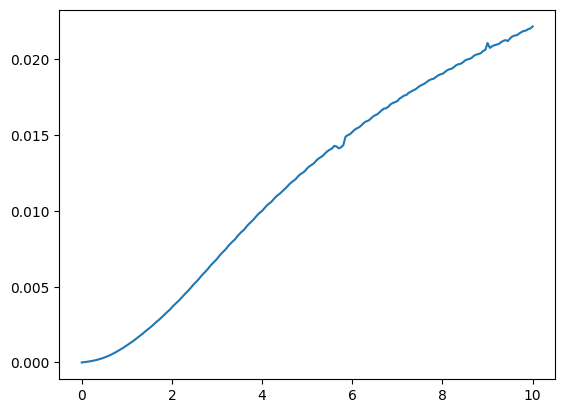

In [15]:
#fig = plt.figure()
plt.plot(voltage_values,current_values)
plt.show()

In [16]:
del device